## Method B

Algorithm Implementation -
Select at least Two Papers and reimplement the method proposed in the papers. Let's call them Method A and Method B. 

 -  Option 1: Implement the algorithm from scratch.
 - Option 2: Use the code provided by the authors (if available) and modify or analyze it as needed.
        (Ensure your implementation can adapt to the ECG5000 dataset.)
    - Document your implementation process and any challenges faced.

Evaluation -
Evaluate the algorithm’s performance using appropriate metrics (e.g., accuracy, sensitivity, specificity).
Compare the performance of your Methods A and B with KNN (you can call it Method C).

Method B Paper: https://onlinelibrary.wiley.com/doi/10.1155/2021/6649970

In [14]:
# Load & Preprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from ecgLoader import load_ecg5000  # ✅ Use your existing loader

from tensorflow.keras import layers, models, Input


X_train, X_test, y_train, y_test = load_ecg5000(one_hot=True)
X_train = X_train[..., np.newaxis]  # shape (samples, 140, 1)
X_test = X_test[..., np.newaxis]


Applied one-hot encoding: (3998, 5)


In [15]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv1D(filters, kernel_size, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv1D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = layers.Conv1D(filters, kernel_size=1, padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet_model(input_shape=(140, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 128)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
model = build_resnet_model()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 140, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 70, 64)    │        512 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 70, 64)    │        256 │ conv1d_24[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 70, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 35, 64)    │          0 │ re_lu_20[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 35, 64)    │     12,352 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 64)    │        256 │ conv1d_25[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_21 (ReLU)     │ (None, 35, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 35, 64)    │     12,352 │ re_lu_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 64)    │        256 │ conv1d_26[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 35, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_22 (ReLU)     │ (None, 35, 64)    │          0 │ add_8[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 35, 128)   │     24,704 │ re_lu_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 128)   │        512 │ conv1d_27[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_23 (ReLU)     │ (None, 35, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_28 (Conv1D)  │ (None, 35, 128)   │     49,280 │ re_lu_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 128)   │        512 │ conv1d_28[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_29 (Conv1D)  │ (None, 35, 128)   │      8,320 │ re_lu_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 35, 128)   │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_24 (ReLU)     │ (None, 35, 128)   │          0 │ add_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 117,893 (460.52 KB)

 Trainable params: 116,997 (457.02 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.8164 - loss: 0.5038 - val_accuracy: 0.4787 - val_loss: 0.7935
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9814 - loss: 0.0732 - val_accuracy: 0.8325 - val_loss: 0.5466
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9874 - loss: 0.0484 - val_accuracy: 0.8250 - val_loss: 0.4889
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9827 - loss: 0.0538 - val_accuracy: 0.5813 - val_loss: 0.6632
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9845 - loss: 0.0430 - val_accuracy: 0.8775 - val_loss: 0.3147
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9886 - loss: 0.0384 - val_accuracy: 0.8587 - val_loss: 0.3136
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9942 - loss: 0.0229 - val_accuracy: 0.8763 - val_loss: 0.3291
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9917 - loss: 0.0222 - val_accuracy: 0.9762 -

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       591
           4       1.00      0.98      0.99       409

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



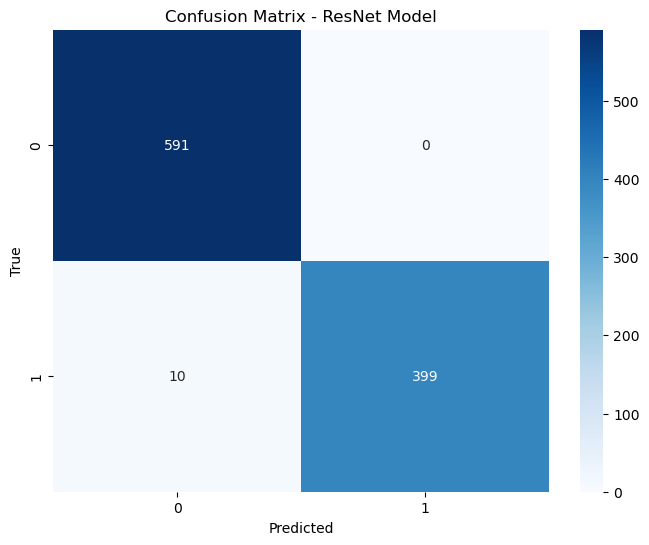

In [17]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet Model')
plt.show()

## Let's try another dataset

In [18]:
from ecgLoader import load_heartbeat_dataset

X_train, X_test, y_train, y_test = load_heartbeat_dataset(one_hot=True)


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape, y_train.shape)

(87556, 187, 1, 1) (87556, 5)


In [19]:
def build_resnet_model_heartbeat(input_shape=(187, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 128)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
model = build_resnet_model_heartbeat()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_30 (Conv1D)  │ (None, 94, 64)    │        512 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 94, 64)    │        256 │ conv1d_30[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_25 (ReLU)     │ (None, 94, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 47, 64)    │          0 │ re_lu_25[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_31 (Conv1D)  │ (None, 47, 64)    │     12,352 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 64)    │        256 │ conv1d_31[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_26 (ReLU)     │ (None, 47, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_32 (Conv1D)  │ (None, 47, 64)    │     12,352 │ re_lu_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 64)    │        256 │ conv1d_32[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 47, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_27 (ReLU)     │ (None, 47, 64)    │          0 │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 47, 128)   │     24,704 │ re_lu_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 128)   │        512 │ conv1d_33[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_28 (ReLU)     │ (None, 47, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 47, 128)   │     49,280 │ re_lu_28[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 128)   │        512 │ conv1d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 47, 128)   │      8,320 │ re_lu_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 47, 128)   │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_35[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_29 (ReLU)     │ (None, 47, 128)   │          0 │ add_11[0][0]      │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 117,893 (460.52 KB)

 Trainable params: 116,997 (457.02 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9151 - loss: 0.2995 - val_accuracy: 0.9524 - val_loss: 0.1740
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 54s 49ms/step - accuracy: 0.9652 - loss: 0.1260 - val_accuracy: 0.9554 - val_loss: 0.1639
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9726 - loss: 0.1027 - val_accuracy: 0.9756 - val_loss: 0.0911
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9758 - loss: 0.0863 - val_accuracy: 0.9749 - val_loss: 0.0907
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.9786 - loss: 0.0763 - val_accuracy: 0.9784 - val_loss: 0.0752
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9805 - loss: 0.0699 - val_accuracy: 0.9742 - val_loss: 0.0941
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9821 - loss: 0.0622 - val_accuracy: 0.9806 - val_loss: 0.0719
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9825 -

In [21]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18160
           1       0.77      0.81      0.79       535
           2       0.98      0.95      0.97      1402
           3       0.88      0.80      0.84       158
           4       1.00      0.99      0.99      1635

    accuracy                           0.98     21890
   macro avg       0.92      0.91      0.92     21890
weighted avg       0.98      0.98      0.98     21890



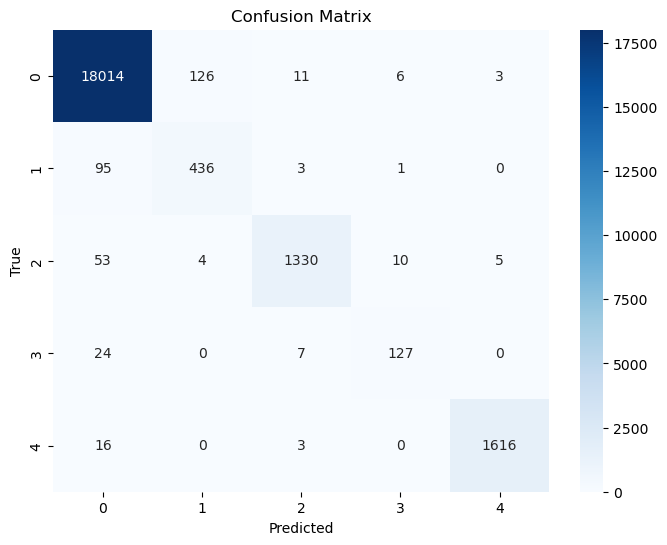

In [22]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()